In [2]:
from Binaries import *

#### Test the overall rate

In [2]:
HardwareTriggers = HardwareClassifier()
trigger_examples_1 = HardwareTriggers.production_test(10000, apply_downsampling = True)

99.99% - 143.11ms/batch, ETA = 0h 0m          

Production test results:

random traces injected: 10000
summed traces duration: 0.1698s
total T2 trigger found: 2
*********************************
TRIGGER FREQUENCY = 11.7773 Hz


In [ ]:
NuriaBackgrounds = EventGenerator(["16_16.5"], prior = 0, split = 1)

# Check for systematic bias?

In [3]:
from scipy.stats import norm

for i in range(NuriaBackgrounds.__len__()):

    trace = NuriaBackgrounds.__getitem__(i, full_trace = True)[0][0]
    x = np.linspace(-12 / np.mean([3380.59, 3508.69, 3158.88]), 12 / np.mean([3380.59, 3508.69, 3158.88]), 100)

    plt.axhline(0, c = "k")
    plt.plot(range(len(trace.pmt_1)), trace.pmt_1)
    plt.plot(range(len(trace.pmt_2)), trace.pmt_2)
    plt.plot(range(len(trace.pmt_3)), trace.pmt_3)

    plt.figure()
    baseline_bins = list(trace.pmt_1) + list(trace.pmt_2) + list(trace.int_3)

    plt.hist(baseline_bins, histtype = "step", bins = 16, range = (-8 / np.mean([3380.59, 3508.69, 3158.88]), 8 / np.mean([3380.59, 3508.69, 3158.88])))
    plt.plot(x, 4 * norm.pdf(x, loc = 0, scale = 4 / np.mean([3380.59, 3508.69, 3158.88])))

    plt.figure()
    plt.axhline(0, c = "k")
    plt.plot(range(len(trace.Baseline[0])), trace.Baseline[0])
    plt.plot(range(len(trace.Baseline[1])), trace.Baseline[1])
    plt.plot(range(len(trace.Baseline[2])), trace.Baseline[2])

    plt.figure()
    baseline_bins = list(trace.Baseline[0]) + list(trace.Baseline[1]) + list(trace.Baseline[2])

    plt.hist(baseline_bins, histtype = "step", bins = 16, range = (-8, 8))
    plt.plot(x, 4 * norm.pdf(x, loc = 0, scale = 2))


    break

NameError: name 'NuriaBackgrounds' is not defined

In [ ]:
from scipy.stats import norm

for i in range(NuriaBackgrounds.__len__()):

    trace = NuriaBackgrounds.__getitem__(i, full_trace = True)[0][0]
    x = np.linspace(-15 / np.mean([3380.59, 3508.69, 3158.88]), 15 / np.mean([3380.59, 3508.69, 3158.88]), 100)

    plt.axhline(0, c = "k")
    plt.plot(range(len(trace.Baseline[0])), trace.int_1)
    plt.plot(range(len(trace.int_2)), trace.int_2)
    plt.plot(range(len(trace.int_3)), trace.int_3)

    plt.figure()
    baseline_bins = list(trace.int_1) + list(trace.int_2) + list(trace.int_3)

    plt.hist(baseline_bins, histtype = "step", bins = 15)
    plt.plot(x, 4 * norm.pdf(x, loc = 0, scale = 4 / np.mean([3380.59, 3508.69, 3158.88])))

    break

In [ ]:
all_integrals = []

for step, (_, _, metadata) in enumerate(NuriaBackgrounds):

    print(f"{step}/{NuriaBackgrounds.__len__()}", end = "\r")
    all_integrals += [i[0] for i in metadata]

In [ ]:
data = np.mean([3380.59, 3508.69, 3158.88]) * np.array(all_integrals)

_, _, _ = plt.hist(data, bins = 1000)

plt.xlim(-200, 10)

In [ ]:
from scipy.stats import norm
means = [[], [], []]

for i in range(NuriaBackgrounds.__len__()):

    trace = NuriaBackgrounds.__getitem__(i, full_trace = True)[0][0]
    # x = np.linspace(-15 / np.mean([3380.59, 3508.69, 3158.88]), 15 / np.mean([3380.59, 3508.69, 3158.88]), 100)

    # plt.axhline(0, c = "k")
    # plt.plot(range(len(trace.pmt_1)), trace.pmt_1)
    # plt.plot(range(len(trace.pmt_2)), trace.pmt_2)
    # plt.plot(range(len(trace.pmt_3)), trace.pmt_3)

    for j in range(3): means[j].append(np.mean(trace.Baseline[j]))

In [ ]:
from scipy.optimize import curve_fit

def gauss(x, A, mu, sigma):

    return A * np.exp((x - mu)**2/(2 * sigma**2))

n, bins, _ = plt.hist(means, histtype = "step", bins = 100)
centers = 0.5 * (bins[1:] + bins[:-1])

x_smooth = np.linspace(min(bins), max(bins), 100)

for i, bin in enumerate(n):

    popt, pconv = curve_fit(gauss, centers, bin)
    plt.plot(x_smooth, gauss(x_smooth, *popt), label = f"PMT #{i}")

In [ ]:
plt.plot(centers, n)

In [ ]:
HardwareTriggers = HardwareClassifier()
trigger_examples_1 = HardwareTriggers.production_test(10000, apply_downsampling = True)

~~~
<!-- with *one lower* vem peak -->
Production test results:

random traces injected: 100000
summed traces duration: 1.698s
total T2 trigger found: 10
*********************************
TRIGGER FREQUENCY = 5.8887 Hz


<!-- with *one higher* vem peak -->
Production test results:

random traces injected: 100000
summed traces duration: 1.698s
total T2 trigger found: 23
*********************************
TRIGGER FREQUENCY = 13.5439 Hz

~~~

# Ah shit here we go again


In [2]:
from Binaries import *

trigger_th2 = np.loadtxt("/cr/tempdata01/filip/iRODS/MonitoringData/th2_rate.csv", usecols = [1, 2])
trigger_all = np.loadtxt("/cr/tempdata01/filip/iRODS/MonitoringData/part_trigger_rates_fixed.csv", usecols = [1, 2])
trace_duration = GLOBAL.n_bins * GLOBAL.single_bin_duration


In [3]:
rate_th2 = [ point[1] / point[0] for point in trigger_th2 ]
rate_all = [ point[0] / (point[1] * trace_duration) for point in trigger_all ]

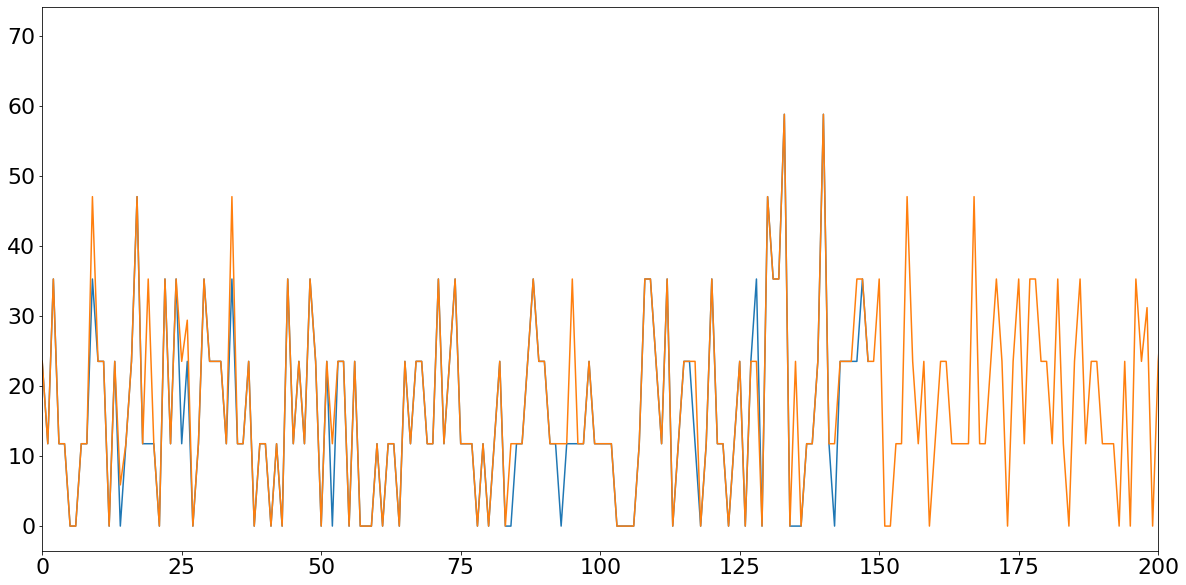

In [5]:
plt.plot(range(len(rate_th2)), rate_th2)
plt.plot(range(len(rate_all)), rate_all)
plt.xlim(0, 200)

plt.rcParams["figure.figsize"] = [20, 10]